In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import zscore


In [3]:
df = pd.read_csv("dados\covid19-0f81afa72854491686b7f93cf598b6fa.csv")

In [4]:
df.isna().sum()

epidemiological_week                                 0
date                                                 0
order_for_place                                      0
state                                                0
city                                             20119
city_ibge_code                                       0
place_type                                           0
last_available_confirmed                             0
last_available_confirmed_per_100k_inhabitants        6
new_confirmed                                        0
last_available_deaths                                0
new_deaths                                           0
last_available_death_rate                            0
estimated_population                                 0
is_last                                              0
is_repeated                                          0
dtype: int64

In [5]:
df.drop(columns="city", inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20119 entries, 0 to 20118
Data columns (total 15 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   epidemiological_week                           20119 non-null  int64  
 1   date                                           20119 non-null  object 
 2   order_for_place                                20119 non-null  int64  
 3   state                                          20119 non-null  object 
 4   city_ibge_code                                 20119 non-null  int64  
 5   place_type                                     20119 non-null  object 
 6   last_available_confirmed                       20119 non-null  int64  
 7   last_available_confirmed_per_100k_inhabitants  20113 non-null  float64
 8   new_confirmed                                  20119 non-null  int64  
 9   last_available_deaths                          201

In [7]:
df['date'] = pd.to_datetime(df['date'])


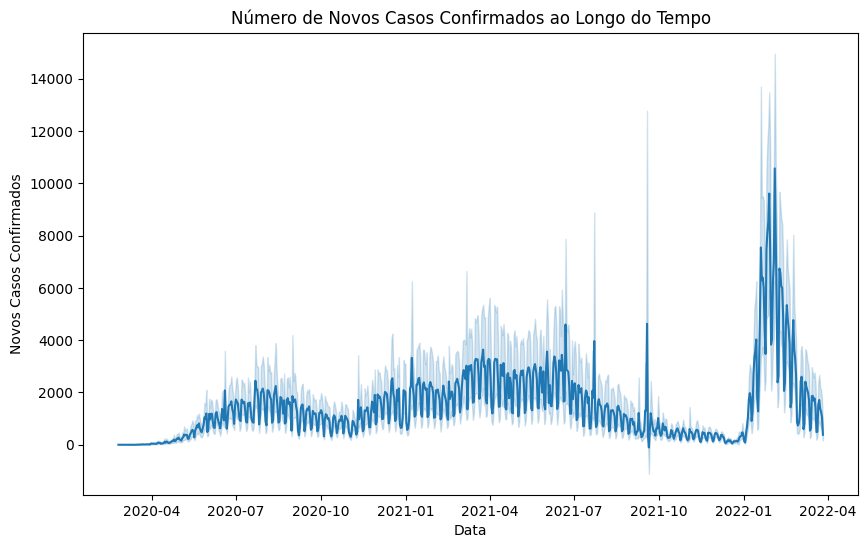

In [8]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='new_confirmed', data=df)
plt.title('Número de Novos Casos Confirmados ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Novos Casos Confirmados')
plt.show()

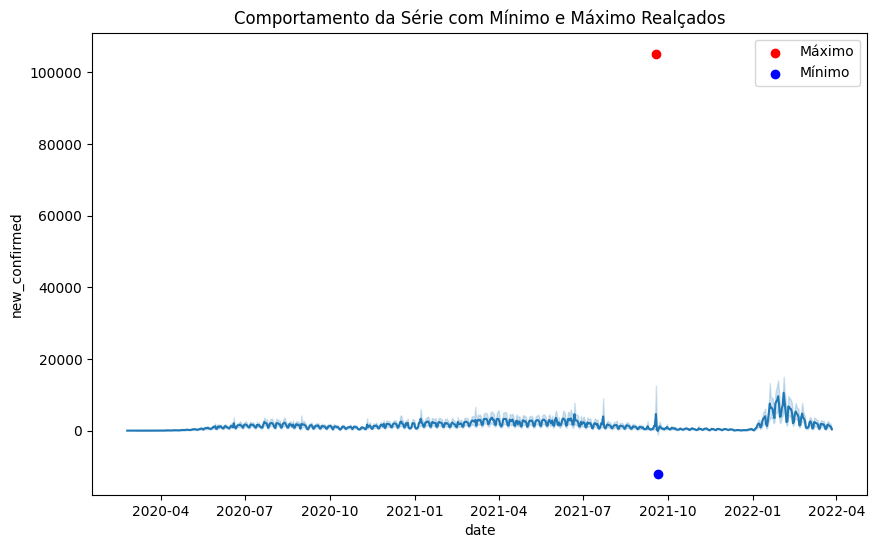

In [9]:
max_value = df['new_confirmed'].max()
min_value = df['new_confirmed'].min()

plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='new_confirmed', data=df)
plt.scatter(df[df['new_confirmed'] == max_value]['date'], [max_value], color='red', label='Máximo', zorder=5)
plt.scatter(df[df['new_confirmed'] == min_value]['date'], [min_value], color='blue', label='Mínimo', zorder=5)
plt.legend()
plt.title('Comportamento da Série com Mínimo e Máximo Realçados')
plt.show()


In [12]:

df['zscore'] = zscore(df['new_confirmed'])
outliers = df[df['zscore'].abs() > 3]  # Valores com Z-score maior que 3 são considerados atípicos


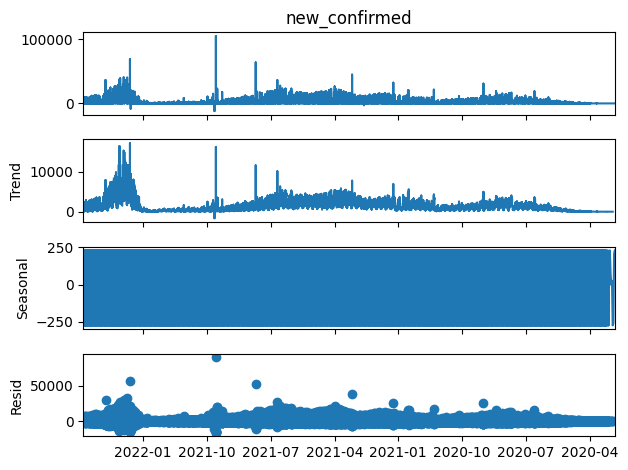

In [13]:
# Decomposição da série temporal
result = seasonal_decompose(df.set_index('date')['new_confirmed'], model='additive', period=7)
result.plot()
plt.show()

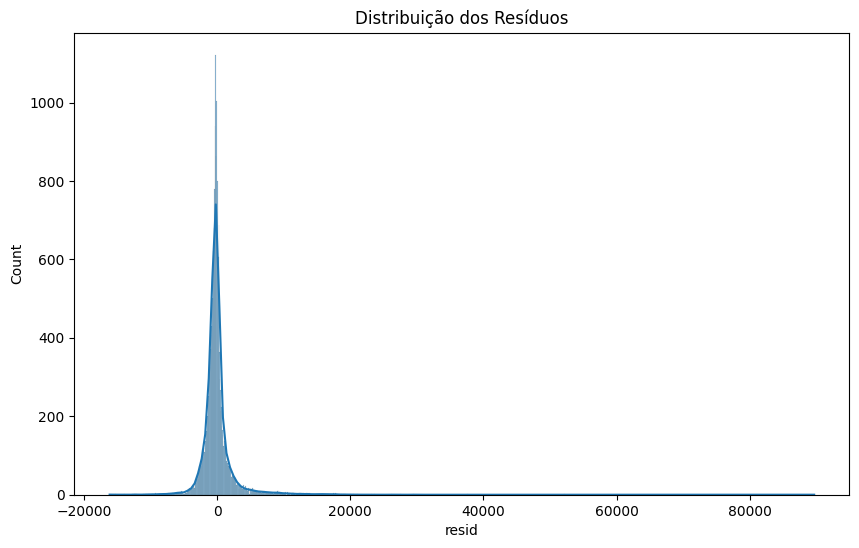

Estatística do teste: 0.6228836889846923, p-valor: 6.690720810243588e-109
Os resíduos não seguem uma distribuição normal (rejeitamos H0)


C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20113.
  res = hypotest_fun_out(*samples, **kwds)


In [14]:
residuos = result.resid.dropna()

# Histograma dos resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True)
plt.title('Distribuição dos Resíduos')
plt.show()

# Teste de normalidade usando o teste de Shapiro-Wilk
from scipy.stats import shapiro
stat, p = shapiro(residuos)
print(f'Estatística do teste: {stat}, p-valor: {p}')

if p > 0.05:
    print("Os resíduos seguem uma distribuição normal (não rejeitamos H0)")
else:
    print("Os resíduos não seguem uma distribuição normal (rejeitamos H0)")